In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


<hi>Install Requirements<h1>

In [2]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [3]:
pip install nltk

In [4]:
pip install wordcloud

In [5]:
import os, re, json, string, pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [6]:
import nltk
nltk.download('punkt') # for tokenizing
nltk.download('stopwords') # for stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<h1>Read Data<h1>

In [7]:
df = pd.read_csv ("/content/drive/MyDrive/Dataset/Wardah.csv", delimiter=";")
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Sep 03 09:04:58 +0000 2023,1698260787213873233,[Bb] micellar water nya wardah ternyata oke ju...,82,147,55,1723,in,994801274091687936,1698260787213873233,ohmybeautybank,https://twitter.com/ohmybeautybank/status/1698...
1,Tue Jul 25 10:05:05 +0000 2023,1683780403205906432,Sumpah aku kira instaperfect itu salah satu se...,215,342,351,8412,in,994801274091687936,1683780403205906432,ohmybeautybank,https://twitter.com/ohmybeautybank/status/1683...
2,Mon Jun 26 14:03:23 +0000 2023,1673331123236089859,Sudah claim beluum? Lumayan bisa buat Wardah ...,0,0,0,3,in,1581884899560423424,1673331123236089859,berburusales,https://twitter.com/berburusales/status/167333...
3,Mon Jun 26 11:14:04 +0000 2023,1673288513029296130,tolong jg salma pake dress kyk wardah utk sile...,0,0,0,43,in,1665564301783089152,1673288513029296130,qellycelily,https://twitter.com/qellycelily/status/1673288...
4,Mon Jun 26 06:49:47 +0000 2023,1673222006119211008,Kalau korang tak pandai mekap....jadilah macam...,1,2,63,39,in,1313351061080481792,1673222006119211008,bysueibrahim_,https://twitter.com/bysueibrahim_/status/16732...
...,...,...,...,...,...,...,...,...,...,...,...,...
174,Sun Jul 29 00:48:26 +0000 2018,1023369625457684480,Sesekali bikin GIVE AWAY Cz Daniel notice Ind...,2,139,692,501,in,2921684654,1023369625457684480,nayinayooow,https://twitter.com/nayinayooow/status/1023369...
175,Thu Jul 19 04:48:27 +0000 2018,1019806148462022657,Punya Lipstik yang hampir habis? Kalian bisa n...,213,166,588,429,in,1850475144,1019806148462022657,WatsonsIndo,https://twitter.com/WatsonsIndo/status/1019806...
176,Sun Feb 04 09:08:19 +0000 2018,960077549379268608,I lagi suka kalau Watsons yang sale sebab bany...,64,40,1324,1528,in,23139167,960077549379268608,ImanAbdulRahim,https://twitter.com/ImanAbdulRahim/status/9600...
177,Sun Jun 11 04:41:00 +0000 2017,873761962445766658,Wardah Beauty dah masuk Watson Malaysia. Benda...,125,20,482,473,in,429675317,873761962445766658,_ikaisme_,https://twitter.com/_ikaisme_/status/873761962...


In [8]:
df.columns

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')

check duplicate

In [9]:
dft = df["full_text"]
df[dft.isin(dft[dft.duplicated()])]

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url


check missing value

In [10]:
df.isnull().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           179 non-null    object
 1   id_str               179 non-null    int64 
 2   full_text            179 non-null    object
 3   quote_count          179 non-null    int64 
 4   reply_count          179 non-null    int64 
 5   retweet_count        179 non-null    int64 
 6   favorite_count       179 non-null    int64 
 7   lang                 179 non-null    object
 8   user_id_str          179 non-null    int64 
 9   conversation_id_str  179 non-null    int64 
 10  username             179 non-null    object
 11  tweet_url            179 non-null    object
dtypes: int64(7), object(5)
memory usage: 16.9+ KB


In [12]:
df.describe()

,id_str,quote_count,reply_count,retweet_count,favorite_count,user_id_str,conversation_id_str
count,1.790000e+02,179.000000,179.000000,179.000000,179.000000,1.790000e+02,1.790000e+02
mean,1.380200e+18,124.480447,173.346369,913.195531,3177.022346,6.492207e+17,1.380192e+18
std,1.840175e+17,240.252497,364.637549,1798.170706,5081.000587,5.524661e+17,1.840132e+17
min,8.216923e+17,0.000000,0.000000,0.000000,3.000000,1.456720e+07,8.216923e+17
25%,1.240586e+18,15.000000,21.000000,147.000000,1009.000000,4.674025e+08,1.240584e+18
50%,1.364969e+18,42.000000,60.000000,342.000000,1528.000000,9.726322e+17,1.364769e+18
75%,1.527188e+18,127.500000,158.000000,870.500000,3270.500000,1.099987e+18,1.527188e+18
max,1.698261e+18,1974.000000,2930.000000,14870.000000,43391.000000,1.665564e+18,1.698261e+18


In [13]:
df.nunique()

created_at             179
id_str                 179
full_text              179
quote_count            109
reply_count            123
retweet_count          167
favorite_count         175
lang                     1
user_id_str            119
conversation_id_str    171
username               119
tweet_url              179
dtype: int64

<h1>Preprocessing Data<h1>

In [14]:
data = df.drop(df.columns[[0,1,3,4,5,6,7,8,9,10,11]], axis=1)
data

,full_text
0,[Bb] micellar water nya wardah ternyata oke ju...
1,Sumpah aku kira instaperfect itu salah satu se...
2,Sudah claim beluum? Lumayan bisa buat Wardah ...
3,tolong jg salma pake dress kyk wardah utk sile...
4,Kalau korang tak pandai mekap....jadilah macam...
...,...
174,Sesekali bikin GIVE AWAY Cz Daniel notice Ind...
175,Punya Lipstik yang hampir habis? Kalian bisa n...
176,I lagi suka kalau Watsons yang sale sebab bany...
177,Wardah Beauty dah masuk Watson Malaysia. Benda...


In [15]:
data.rename(columns={"full_text" : "tweet"}, inplace=True)
data

,tweet
0,[Bb] micellar water nya wardah ternyata oke ju...
1,Sumpah aku kira instaperfect itu salah satu se...
2,Sudah claim beluum? Lumayan bisa buat Wardah ...
3,tolong jg salma pake dress kyk wardah utk sile...
4,Kalau korang tak pandai mekap....jadilah macam...
...,...
174,Sesekali bikin GIVE AWAY Cz Daniel notice Ind...
175,Punya Lipstik yang hampir habis? Kalian bisa n...
176,I lagi suka kalau Watsons yang sale sebab bany...
177,Wardah Beauty dah masuk Watson Malaysia. Benda...


In [16]:
data["tweet_lower"] = data.tweet.str.lower()
data

,tweet,tweet_lower
0,[Bb] micellar water nya wardah ternyata oke ju...,[bb] micellar water nya wardah ternyata oke ju...
1,Sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...
2,Sudah claim beluum? Lumayan bisa buat Wardah ...,sudah claim beluum? lumayan bisa buat wardah ...
3,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...
4,Kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap....jadilah macam...
...,...,...
174,Sesekali bikin GIVE AWAY Cz Daniel notice Ind...,sesekali bikin give away cz daniel notice ind...
175,Punya Lipstik yang hampir habis? Kalian bisa n...,punya lipstik yang hampir habis? kalian bisa n...
176,I lagi suka kalau Watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...
177,Wardah Beauty dah masuk Watson Malaysia. Benda...,wardah beauty dah masuk watson malaysia. benda...


Cleaning Data : remove numbers, username, tag @, hashtag #, link URL, and emojis

In [17]:
import re #regex library

# remove numbers, username, tag @, hashtag #, link URL, and emojis
clean_text = lambda x: re.sub("([@#]([A-Za-z]+[A-Za-z0-9-_]+))|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\d+)|(\b[a-zA-Z]\b)"," ",x)
data["tweet_cleaned"] = data.tweet_lower.map(clean_text)
data

,tweet,tweet_lower,tweet_cleaned
0,[Bb] micellar water nya wardah ternyata oke ju...,[bb] micellar water nya wardah ternyata oke ju...,bb micellar water nya wardah ternyata oke ju...
1,Sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...
2,Sudah claim beluum? Lumayan bisa buat Wardah ...,sudah claim beluum? lumayan bisa buat wardah ...,sudah claim beluum lumayan bisa buat wardah
3,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...
4,Kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap jadilah macam...
...,...,...,...
174,Sesekali bikin GIVE AWAY Cz Daniel notice Ind...,sesekali bikin give away cz daniel notice ind...,sesekali bikin give away cz daniel notice ind...
175,Punya Lipstik yang hampir habis? Kalian bisa n...,punya lipstik yang hampir habis? kalian bisa n...,punya lipstik yang hampir habis kalian bisa n...
176,I lagi suka kalau Watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...
177,Wardah Beauty dah masuk Watson Malaysia. Benda...,wardah beauty dah masuk watson malaysia. benda...,wardah beauty dah masuk watson malaysia benda...


In [18]:
# remove whitespaces
def remove_whitespace_LT(text):
  return text.strip()

def remove_whitespace_multiple(text):
  return re.sub('\s+',' ', text)

data['tweet_cleaned'] = data['tweet_cleaned'].apply(remove_whitespace_LT).apply(remove_whitespace_multiple)

In [19]:
data.loc[[9,10], ['tweet','tweet_cleaned']]

,tweet,tweet_cleaned
9,@xavierbackk @AREAJULID Meanwhile.. CEO wardah...,meanwhile ceo wardah emina dll
10,@FOODFESS2 Wardah colorfit https://t.co/wUrmep...,wardah colorfit


Tokenize

In [20]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [21]:
# Apply tokenization on 'text' column
data['tweet_token'] = data['tweet_cleaned'].apply(tokenize_text)
data['tweet_token']

0      [bb, micellar, water, nya, wardah, ternyata, o...
1      [sumpah, aku, kira, instaperfect, itu, salah, ...
2      [sudah, claim, beluum, lumayan, bisa, buat, wa...
3      [tolong, jg, salma, pake, dress, kyk, wardah, ...
4      [kalau, korang, tak, pandai, mekap, jadilah, m...
                             ...                        
174    [sesekali, bikin, give, away, cz, daniel, noti...
175    [punya, lipstik, yang, hampir, habis, kalian, ...
176    [i, lagi, suka, kalau, watsons, yang, sale, se...
177    [wardah, beauty, dah, masuk, watson, malaysia,...
178                          [ni, wardah, ke, wardahell]
Name: tweet_token, Length: 179, dtype: object

In [22]:
data.loc[[9,10], ['tweet_cleaned','tweet_token']]

,tweet_cleaned,tweet_token
9,meanwhile ceo wardah emina dll,"[meanwhile, ceo, wardah, emina, dll]"
10,wardah colorfit,"[wardah, colorfit]"


Words Normalization

In [23]:
kamus_alay = pd.read_csv("colloquial-indonesian-lexicon.csv") # https://github.com/nasalsabila/kamus-alay
dr_github1 = pd.read_csv('normalisasi.csv') # https://github.com/jbkalit/Sentiment-Analysis-Final-Project/blob/master/normalisasi.csv
manual = pd.read_excel("normalization_manual.xlsx") # made ourself

normalized_dict = {}

# input normalized words into dict
def append_dict(list_normalized_words):
    for index, row in list_normalized_words.iterrows():
        if row[0] not in normalized_dict:
            normalized_dict[row[0]] = row[1]

append_dict(manual)
append_dict(kamus_alay)
append_dict(dr_github1)

# print(normalized_dict)

def normalized_term(document):
    return [
        normalized_dict[term]
        if term in normalized_dict
        else
        term for term in document
    ]

from nltk.tokenize.treebank import TreebankWordDetokenizer
data['tweet_normalized'] = data['tweet_token'].apply(normalized_term)
data['tweet_normalized'].head(5)

0    [bb, micellar, water, nya, wardah, ternyata, o...
1    [sumpah, saya, kira, instaperfect, itu, salah,...
2    [sudah, klaim, beluum, lumayan, bisa, buat, wa...
3    [tolong, juga, salma, pakai, dress, kayak, war...
4    [kalau, kalian, tidak, pandai, mekap, jadilah,...
Name: tweet_normalized, dtype: object

In [24]:
data.loc[[9,10], ['tweet_token','tweet_normalized']]

,tweet_token,tweet_normalized
9,"[meanwhile, ceo, wardah, emina, dll]","[meanwhile, ceo, wardah, emina, dan lain lain]"
10,"[wardah, colorfit]","[wardah, colorfit]"


Stopwords Removal

In [25]:
from nltk.corpus import stopwords

stopword = stopwords.words('indonesian')

# append manual stopwords
txt_stopword1 = pd.read_csv("id.stopwords.02.01.2016.txt", names= ["stopwords"], header = None) # https://github.com/masdevid/ID-Stopwords
txt_stopword2 = pd.read_csv("stopword_id.csv", names= ["stopwords"], header = None) # https://stopwords.net/indonesian-id/
txt_stopword3 = pd.read_csv("stopwords_manual.csv", names= ["stopwords"], header = None) # made ourself

stopword.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'ki', 'j', 'rl', 'jt', 'jog',
                       'fess', 'nya', 'bi', 'cw', 'oh', 'mahh', 'suerr'
                       'paw', 'gar', 'itb', 'nak', 'je'])

stopword.extend(txt_stopword3["stopwords"])
stopword.extend(txt_stopword1["stopwords"])
stopword.extend(txt_stopword2["stopwords"])

# convert list to dict
stopword_list = set(stopword)

# remove stopwords
def stopwords_removal(words):
    return [word for word in words if word not in stopword_list]

data['tweet_stopwords_removed'] = data['tweet_normalized'].apply(stopwords_removal)

print(data['tweet_stopwords_removed'].head(10))

0    [bb, micellar, water, wardah, hasil, menerjang...
1    [sumpah, instaperfect, salah, series, wardah, ...
2                     [klaim, beluum, lumayan, wardah]
3    [tolong, salma, pakai, dress, kayak, wardah, s...
4    [pandai, mekap, pakai, wardah, fd, cushion, be...
5    [giveaway, hadiahnya, paket, makeup, wardah, f...
6               [cocok, ba, wardah, muka, halal, adem]
7    [sabar, nunggu, yuniq, st, cawang, wardah, st,...
8    [kaayy, jumpa, shade, lipstick, sesuai, with, ...
9                      [meanwhile, ceo, wardah, emina]
Name: tweet_stopwords_removed, dtype: object


In [26]:
data.loc[[0,1], ['tweet_normalized','tweet_stopwords_removed']]

,tweet_normalized,tweet_stopwords_removed
0,"[bb, micellar, water, nya, wardah, ternyata, o...","[bb, micellar, water, wardah, hasil, menerjang..."
1,"[sumpah, saya, kira, instaperfect, itu, salah,...","[sumpah, instaperfect, salah, series, wardah, ..."


Stemming

In [27]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming process
def stems(text):
    return stemmer.stem(text)

data['tweet_stemmed'] = data['tweet_stopwords_removed'].apply(TreebankWordDetokenizer().detokenize).apply(stems)
data['tweet_stemmed'].head(15)

0         bb micellar water wardah hasil terjang polusi
1     sumpah instaperfect salah series wardah merk s...
2                           klaim beluum lumayan wardah
3     tolong salma pakai dress kayak wardah silet aw...
4     pandai mekap pakai wardah fd cushion besttt te...
5     giveaway hadiah paket makeup wardah foto orang...
6                       cocok ba wardah muka halal adem
7     sabar nunggu yuniq st cawang wardah st yogyaka...
8     kaayy jumpa shade lipstick sesuai with skin pa...
9                            meanwhile ceo wardah emina
10                                      wardah colorfit
11             mending saran serum wardah implora mahal
12    sampo tresemme condi wardah tonic blishful hai...
13    bentuk hasil branding usaha sadar orang nama w...
14    malas pakai foundation pakai dd cream wardah a...
Name: tweet_stemmed, dtype: object

In [28]:
data["tweet_tokenized"] = data['tweet_stemmed'].apply(word_tokenize)
data["tweet_tokenized"].head(5)

0    [bb, micellar, water, wardah, hasil, terjang, ...
1    [sumpah, instaperfect, salah, series, wardah, ...
2                     [klaim, beluum, lumayan, wardah]
3    [tolong, salma, pakai, dress, kayak, wardah, s...
4    [pandai, mekap, pakai, wardah, fd, cushion, be...
Name: tweet_tokenized, dtype: object

In [29]:
data.loc[[9,10], ['tweet_stopwords_removed','tweet_tokenized']]

,tweet_stopwords_removed,tweet_tokenized
9,"[meanwhile, ceo, wardah, emina]","[meanwhile, ceo, wardah, emina]"
10,"[wardah, colorfit]","[wardah, colorfit]"


In [30]:
data

,tweet,tweet_lower,tweet_cleaned,tweet_token,tweet_normalized,tweet_stopwords_removed,tweet_stemmed,tweet_tokenized
0,[Bb] micellar water nya wardah ternyata oke ju...,[bb] micellar water nya wardah ternyata oke ju...,bb micellar water nya wardah ternyata oke juga...,"[bb, micellar, water, nya, wardah, ternyata, o...","[bb, micellar, water, nya, wardah, ternyata, o...","[bb, micellar, water, wardah, hasil, menerjang...",bb micellar water wardah hasil terjang polusi,"[bb, micellar, water, wardah, hasil, terjang, ..."
1,Sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...,"[sumpah, aku, kira, instaperfect, itu, salah, ...","[sumpah, saya, kira, instaperfect, itu, salah,...","[sumpah, instaperfect, salah, series, wardah, ...",sumpah instaperfect salah series wardah merk s...,"[sumpah, instaperfect, salah, series, wardah, ..."
2,Sudah claim beluum? Lumayan bisa buat Wardah ...,sudah claim beluum? lumayan bisa buat wardah ...,sudah claim beluum lumayan bisa buat wardah,"[sudah, claim, beluum, lumayan, bisa, buat, wa...","[sudah, klaim, beluum, lumayan, bisa, buat, wa...","[klaim, beluum, lumayan, wardah]",klaim beluum lumayan wardah,"[klaim, beluum, lumayan, wardah]"
3,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...,"[tolong, jg, salma, pake, dress, kyk, wardah, ...","[tolong, juga, salma, pakai, dress, kayak, war...","[tolong, salma, pakai, dress, kayak, wardah, s...",tolong salma pakai dress kayak wardah silet aw...,"[tolong, salma, pakai, dress, kayak, wardah, s..."
4,Kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap jadilah macam sa...,"[kalau, korang, tak, pandai, mekap, jadilah, m...","[kalau, kalian, tidak, pandai, mekap, jadilah,...","[pandai, mekap, pakai, wardah, fd, cushion, be...",pandai mekap pakai wardah fd cushion besttt te...,"[pandai, mekap, pakai, wardah, fd, cushion, be..."
...,...,...,...,...,...,...,...,...
174,Sesekali bikin GIVE AWAY Cz Daniel notice Ind...,sesekali bikin give away cz daniel notice ind...,sesekali bikin give away cz daniel notice indo...,"[sesekali, bikin, give, away, cz, daniel, noti...","[sesekali, bikin, kasih, away, cz, daniel, not...","[kasih, away, cz, daniel, notice, indonesia, v...",kasih away cz daniel notice indonesia vlive m ...,"[kasih, away, cz, daniel, notice, indonesia, v..."
175,Punya Lipstik yang hampir habis? Kalian bisa n...,punya lipstik yang hampir habis? kalian bisa n...,punya lipstik yang hampir habis kalian bisa ni...,"[punya, lipstik, yang, hampir, habis, kalian, ...","[punya, lipstik, yang, hampir, habis, kalian, ...","[lipstik, habis, dapatkan, diskon, membawa, li...",lipstik habis dapat diskon bawa lipstik lama w...,"[lipstik, habis, dapat, diskon, bawa, lipstik,..."
176,I lagi suka kalau Watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...,"[i, lagi, suka, kalau, watsons, yang, sale, se...","[i, lagi, suka, kalau, watsons, yang, sale, se...","[suka, watsons, sale, brand, cuba, contohnya, ...",suka watsons sale brand cuba contoh naruko war...,"[suka, watsons, sale, brand, cuba, contoh, nar..."
177,Wardah Beauty dah masuk Watson Malaysia. Benda...,wardah beauty dah masuk watson malaysia. benda...,wardah beauty dah masuk watson malaysia benda ...,"[wardah, beauty, dah, masuk, watson, malaysia,...","[wardah, beauty, sudah, masuk, watson, malaysi...","[wardah, beauty, masuk, watson, benda, first, ...",wardah beauty masuk watson benda first tengok ...,"[wardah, beauty, masuk, watson, benda, first, ..."


--

Sentiment Categories

In [31]:
from textblob import TextBlob

In [32]:
data['sentiment'] = data['tweet_stemmed'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [33]:
data

,tweet,tweet_lower,tweet_cleaned,tweet_token,tweet_normalized,tweet_stopwords_removed,tweet_stemmed,tweet_tokenized,sentiment
0,[Bb] micellar water nya wardah ternyata oke ju...,[bb] micellar water nya wardah ternyata oke ju...,bb micellar water nya wardah ternyata oke juga...,"[bb, micellar, water, nya, wardah, ternyata, o...","[bb, micellar, water, nya, wardah, ternyata, o...","[bb, micellar, water, wardah, hasil, menerjang...",bb micellar water wardah hasil terjang polusi,"[bb, micellar, water, wardah, hasil, terjang, ...",0.000000
1,Sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...,"[sumpah, aku, kira, instaperfect, itu, salah, ...","[sumpah, saya, kira, instaperfect, itu, salah,...","[sumpah, instaperfect, salah, series, wardah, ...",sumpah instaperfect salah series wardah merk s...,"[sumpah, instaperfect, salah, series, wardah, ...",0.000000
2,Sudah claim beluum? Lumayan bisa buat Wardah ...,sudah claim beluum? lumayan bisa buat wardah ...,sudah claim beluum lumayan bisa buat wardah,"[sudah, claim, beluum, lumayan, bisa, buat, wa...","[sudah, klaim, beluum, lumayan, bisa, buat, wa...","[klaim, beluum, lumayan, wardah]",klaim beluum lumayan wardah,"[klaim, beluum, lumayan, wardah]",0.000000
3,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...,"[tolong, jg, salma, pake, dress, kyk, wardah, ...","[tolong, juga, salma, pakai, dress, kayak, war...","[tolong, salma, pakai, dress, kayak, wardah, s...",tolong salma pakai dress kayak wardah silet aw...,"[tolong, salma, pakai, dress, kayak, wardah, s...",0.000000
4,Kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap jadilah macam sa...,"[kalau, korang, tak, pandai, mekap, jadilah, m...","[kalau, kalian, tidak, pandai, mekap, jadilah,...","[pandai, mekap, pakai, wardah, fd, cushion, be...",pandai mekap pakai wardah fd cushion besttt te...,"[pandai, mekap, pakai, wardah, fd, cushion, be...",0.000000
...,...,...,...,...,...,...,...,...,...
174,Sesekali bikin GIVE AWAY Cz Daniel notice Ind...,sesekali bikin give away cz daniel notice ind...,sesekali bikin give away cz daniel notice indo...,"[sesekali, bikin, give, away, cz, daniel, noti...","[sesekali, bikin, kasih, away, cz, daniel, not...","[kasih, away, cz, daniel, notice, indonesia, v...",kasih away cz daniel notice indonesia vlive m ...,"[kasih, away, cz, daniel, notice, indonesia, v...",0.500000
175,Punya Lipstik yang hampir habis? Kalian bisa n...,punya lipstik yang hampir habis? kalian bisa n...,punya lipstik yang hampir habis kalian bisa ni...,"[punya, lipstik, yang, hampir, habis, kalian, ...","[punya, lipstik, yang, hampir, habis, kalian, ...","[lipstik, habis, dapatkan, diskon, membawa, li...",lipstik habis dapat diskon bawa lipstik lama w...,"[lipstik, habis, dapat, diskon, bawa, lipstik,...",0.000000
176,I lagi suka kalau Watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...,"[i, lagi, suka, kalau, watsons, yang, sale, se...","[i, lagi, suka, kalau, watsons, yang, sale, se...","[suka, watsons, sale, brand, cuba, contohnya, ...",suka watsons sale brand cuba contoh naruko war...,"[suka, watsons, sale, brand, cuba, contoh, nar...",0.214286
177,Wardah Beauty dah masuk Watson Malaysia. Benda...,wardah beauty dah masuk watson malaysia. benda...,wardah beauty dah masuk watson malaysia benda ...,"[wardah, beauty, dah, masuk, watson, malaysia,...","[wardah, beauty, sudah, masuk, watson, malaysi...","[wardah, beauty, masuk, watson, benda, first, ...",wardah beauty masuk watson benda first tengok ...,"[wardah, beauty, masuk, watson, benda, first, ...",0.250000


Output sentimen (menghasilkan nilai dalam rentang -1 hingga 1)
Nilai positif menunjukkan sentimen positif, nilai negatif
*  Nilai positif menunjukkan sentimen positif, nilai negatif menunjukkan sentimen negatif

Output subjektivitas (menghasilkan nilai dalam rentang 0 hingga 1, di mana 1 menunjukkan subjektivitas tinggi)
*   Semakin mendekati 1, semakin subjektif teksnya







In [34]:
data['text_length'] = data['tweet_stemmed'].apply(len)
data['text_length']

0       45
1       55
2       27
3       62
4       93
      ... 
174    146
175    161
176     89
177     71
178     16
Name: text_length, Length: 179, dtype: int64

In [35]:
sentiment_correlation = data[['text_length', 'sentiment']].corr()
print('Correlation between text_length and sentiment:')
print(sentiment_correlation)

Correlation between text_length and sentiment:
             text_length  sentiment
text_length     1.000000   0.119608
sentiment       0.119608   1.000000


In [36]:
def word_frequency(word):
  return data[data['tweet_stemmed'].str.contains(word, case=False, na=False)]['text_length'].mean()

word_example_frequency = word_frequency('mixue')
print('Average score for comments containing the word "mixue":', word_example_frequency)

Average score for comments containing the word "mixue": nan


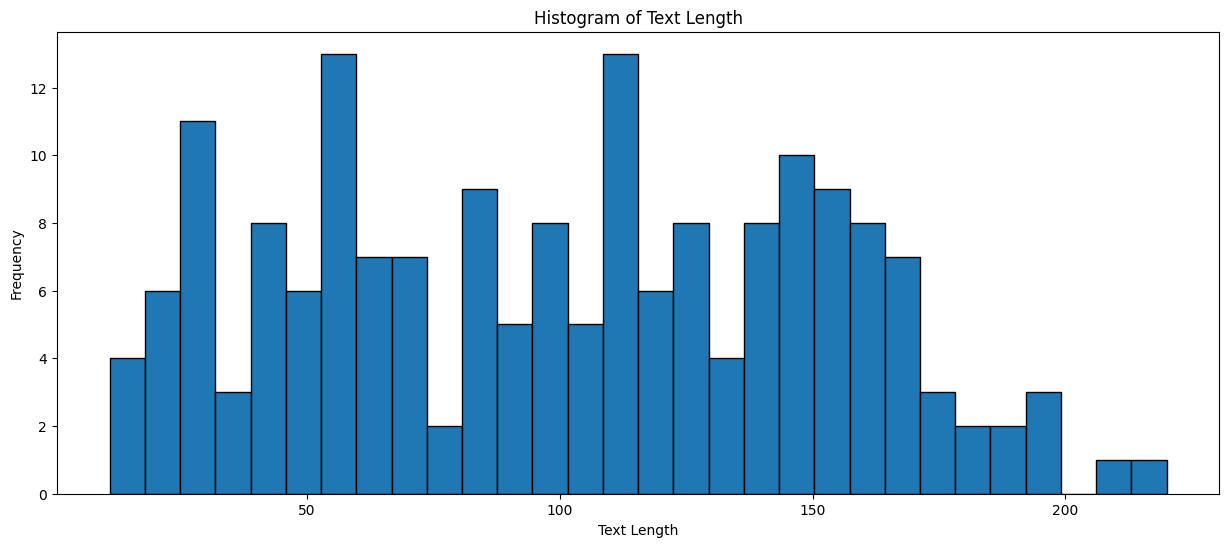

In [37]:
plt.figure(figsize=(15,6))
plt.hist(data['text_length'], bins=30, edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.show()


In [38]:
data

,tweet,tweet_lower,tweet_cleaned,tweet_token,tweet_normalized,tweet_stopwords_removed,tweet_stemmed,tweet_tokenized,sentiment,text_length
0,[Bb] micellar water nya wardah ternyata oke ju...,[bb] micellar water nya wardah ternyata oke ju...,bb micellar water nya wardah ternyata oke juga...,"[bb, micellar, water, nya, wardah, ternyata, o...","[bb, micellar, water, nya, wardah, ternyata, o...","[bb, micellar, water, wardah, hasil, menerjang...",bb micellar water wardah hasil terjang polusi,"[bb, micellar, water, wardah, hasil, terjang, ...",0.000000,45
1,Sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...,"[sumpah, aku, kira, instaperfect, itu, salah, ...","[sumpah, saya, kira, instaperfect, itu, salah,...","[sumpah, instaperfect, salah, series, wardah, ...",sumpah instaperfect salah series wardah merk s...,"[sumpah, instaperfect, salah, series, wardah, ...",0.000000,55
2,Sudah claim beluum? Lumayan bisa buat Wardah ...,sudah claim beluum? lumayan bisa buat wardah ...,sudah claim beluum lumayan bisa buat wardah,"[sudah, claim, beluum, lumayan, bisa, buat, wa...","[sudah, klaim, beluum, lumayan, bisa, buat, wa...","[klaim, beluum, lumayan, wardah]",klaim beluum lumayan wardah,"[klaim, beluum, lumayan, wardah]",0.000000,27
3,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...,"[tolong, jg, salma, pake, dress, kyk, wardah, ...","[tolong, juga, salma, pakai, dress, kayak, war...","[tolong, salma, pakai, dress, kayak, wardah, s...",tolong salma pakai dress kayak wardah silet aw...,"[tolong, salma, pakai, dress, kayak, wardah, s...",0.000000,62
4,Kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap jadilah macam sa...,"[kalau, korang, tak, pandai, mekap, jadilah, m...","[kalau, kalian, tidak, pandai, mekap, jadilah,...","[pandai, mekap, pakai, wardah, fd, cushion, be...",pandai mekap pakai wardah fd cushion besttt te...,"[pandai, mekap, pakai, wardah, fd, cushion, be...",0.000000,93
...,...,...,...,...,...,...,...,...,...,...
174,Sesekali bikin GIVE AWAY Cz Daniel notice Ind...,sesekali bikin give away cz daniel notice ind...,sesekali bikin give away cz daniel notice indo...,"[sesekali, bikin, give, away, cz, daniel, noti...","[sesekali, bikin, kasih, away, cz, daniel, not...","[kasih, away, cz, daniel, notice, indonesia, v...",kasih away cz daniel notice indonesia vlive m ...,"[kasih, away, cz, daniel, notice, indonesia, v...",0.500000,146
175,Punya Lipstik yang hampir habis? Kalian bisa n...,punya lipstik yang hampir habis? kalian bisa n...,punya lipstik yang hampir habis kalian bisa ni...,"[punya, lipstik, yang, hampir, habis, kalian, ...","[punya, lipstik, yang, hampir, habis, kalian, ...","[lipstik, habis, dapatkan, diskon, membawa, li...",lipstik habis dapat diskon bawa lipstik lama w...,"[lipstik, habis, dapat, diskon, bawa, lipstik,...",0.000000,161
176,I lagi suka kalau Watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...,"[i, lagi, suka, kalau, watsons, yang, sale, se...","[i, lagi, suka, kalau, watsons, yang, sale, se...","[suka, watsons, sale, brand, cuba, contohnya, ...",suka watsons sale brand cuba contoh naruko war...,"[suka, watsons, sale, brand, cuba, contoh, nar...",0.214286,89
177,Wardah Beauty dah masuk Watson Malaysia. Benda...,wardah beauty dah masuk watson malaysia. benda...,wardah beauty dah masuk watson malaysia benda ...,"[wardah, beauty, dah, masuk, watson, malaysia,...","[wardah, beauty, sudah, masuk, watson, malaysi...","[wardah, beauty, masuk, watson, benda, first, ...",wardah beauty masuk watson benda first tengok ...,"[wardah, beauty, masuk, watson, benda, first, ...",0.250000,71


In [39]:
highest_score_index = data['sentiment'].idxmax()
lowest_score_index =data['sentiment'].idxmin()

highest_score_text = data.loc[highest_score_index, 'tweet_stemmed']
highest_score = data.loc[highest_score_index, 'sentiment']

lowest_score_text = data.loc[lowest_score_index, 'tweet_stemmed']
lowest_score = data.loc[lowest_score_index, 'sentiment']

print(f"Comment with the highest score ({highest_score}):")
print(highest_score_text)
print("\n")
print(f"Comment with the lowest score ({lowest_score}):")
print(lowest_score_text)


Comment with the highest score (1.0):
tanned skin wardah lip mousse code the best best colour ever dalah pakai pakai soooo ringannnn loveeeeeit


Comment with the lowest score (-0.6999999999999998):
emina sun protection spf warna aneh bau aneh perih sengaja kena mata muka becek oily gerah keringetan too bad dibandingin wardah implora pakai jauhhhhhh


In [40]:
def categorize_sentiment(polarity):
  if polarity > 0.05:
    return 'Positive'
  elif polarity < -0.05:
    return 'Negative'
  else:
    return 'Neutral'

In [41]:
data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)
data

,tweet,tweet_lower,tweet_cleaned,tweet_token,tweet_normalized,tweet_stopwords_removed,tweet_stemmed,tweet_tokenized,sentiment,text_length,sentiment_category
0,[Bb] micellar water nya wardah ternyata oke ju...,[bb] micellar water nya wardah ternyata oke ju...,bb micellar water nya wardah ternyata oke juga...,"[bb, micellar, water, nya, wardah, ternyata, o...","[bb, micellar, water, nya, wardah, ternyata, o...","[bb, micellar, water, wardah, hasil, menerjang...",bb micellar water wardah hasil terjang polusi,"[bb, micellar, water, wardah, hasil, terjang, ...",0.000000,45,Neutral
1,Sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...,sumpah aku kira instaperfect itu salah satu se...,"[sumpah, aku, kira, instaperfect, itu, salah, ...","[sumpah, saya, kira, instaperfect, itu, salah,...","[sumpah, instaperfect, salah, series, wardah, ...",sumpah instaperfect salah series wardah merk s...,"[sumpah, instaperfect, salah, series, wardah, ...",0.000000,55,Neutral
2,Sudah claim beluum? Lumayan bisa buat Wardah ...,sudah claim beluum? lumayan bisa buat wardah ...,sudah claim beluum lumayan bisa buat wardah,"[sudah, claim, beluum, lumayan, bisa, buat, wa...","[sudah, klaim, beluum, lumayan, bisa, buat, wa...","[klaim, beluum, lumayan, wardah]",klaim beluum lumayan wardah,"[klaim, beluum, lumayan, wardah]",0.000000,27,Neutral
3,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...,tolong jg salma pake dress kyk wardah utk sile...,"[tolong, jg, salma, pake, dress, kyk, wardah, ...","[tolong, juga, salma, pakai, dress, kayak, war...","[tolong, salma, pakai, dress, kayak, wardah, s...",tolong salma pakai dress kayak wardah silet aw...,"[tolong, salma, pakai, dress, kayak, wardah, s...",0.000000,62,Neutral
4,Kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap....jadilah macam...,kalau korang tak pandai mekap jadilah macam sa...,"[kalau, korang, tak, pandai, mekap, jadilah, m...","[kalau, kalian, tidak, pandai, mekap, jadilah,...","[pandai, mekap, pakai, wardah, fd, cushion, be...",pandai mekap pakai wardah fd cushion besttt te...,"[pandai, mekap, pakai, wardah, fd, cushion, be...",0.000000,93,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
174,Sesekali bikin GIVE AWAY Cz Daniel notice Ind...,sesekali bikin give away cz daniel notice ind...,sesekali bikin give away cz daniel notice indo...,"[sesekali, bikin, give, away, cz, daniel, noti...","[sesekali, bikin, kasih, away, cz, daniel, not...","[kasih, away, cz, daniel, notice, indonesia, v...",kasih away cz daniel notice indonesia vlive m ...,"[kasih, away, cz, daniel, notice, indonesia, v...",0.500000,146,Positive
175,Punya Lipstik yang hampir habis? Kalian bisa n...,punya lipstik yang hampir habis? kalian bisa n...,punya lipstik yang hampir habis kalian bisa ni...,"[punya, lipstik, yang, hampir, habis, kalian, ...","[punya, lipstik, yang, hampir, habis, kalian, ...","[lipstik, habis, dapatkan, diskon, membawa, li...",lipstik habis dapat diskon bawa lipstik lama w...,"[lipstik, habis, dapat, diskon, bawa, lipstik,...",0.000000,161,Neutral
176,I lagi suka kalau Watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...,i lagi suka kalau watsons yang sale sebab bany...,"[i, lagi, suka, kalau, watsons, yang, sale, se...","[i, lagi, suka, kalau, watsons, yang, sale, se...","[suka, watsons, sale, brand, cuba, contohnya, ...",suka watsons sale brand cuba contoh naruko war...,"[suka, watsons, sale, brand, cuba, contoh, nar...",0.214286,89,Positive
177,Wardah Beauty dah masuk Watson Malaysia. Benda...,wardah beauty dah masuk watson malaysia. benda...,wardah beauty dah masuk watson malaysia benda ...,"[wardah, beauty, dah, masuk, watson, malaysia,...","[wardah, beauty, sudah, masuk, watson, malaysi...","[wardah, beauty, masuk, watson, benda, first, ...",wardah beauty masuk watson benda first tengok ...,"[wardah, beauty, masuk, watson, benda, first, ...",0.2

In [42]:
data['sentiment_category'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [43]:
data['sentiment_category'].value_counts()

Neutral     132
Positive     43
Negative      4
Name: sentiment_category, dtype: int64

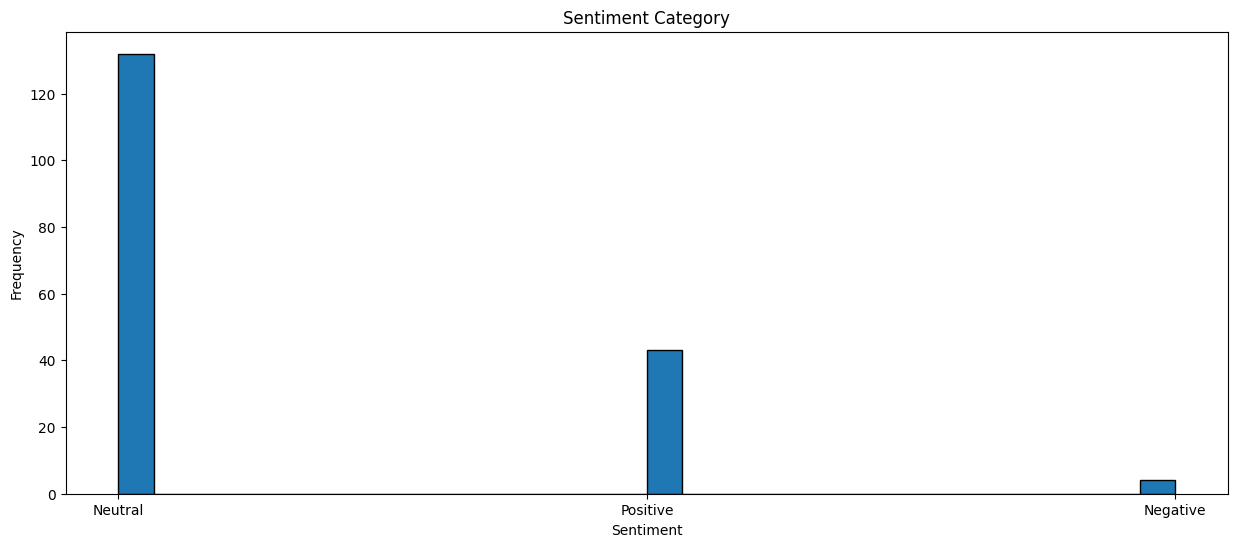

In [44]:
plt.figure(figsize=(15,6))
plt.hist(data['sentiment_category'], bins=30, edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Category')
plt.show()

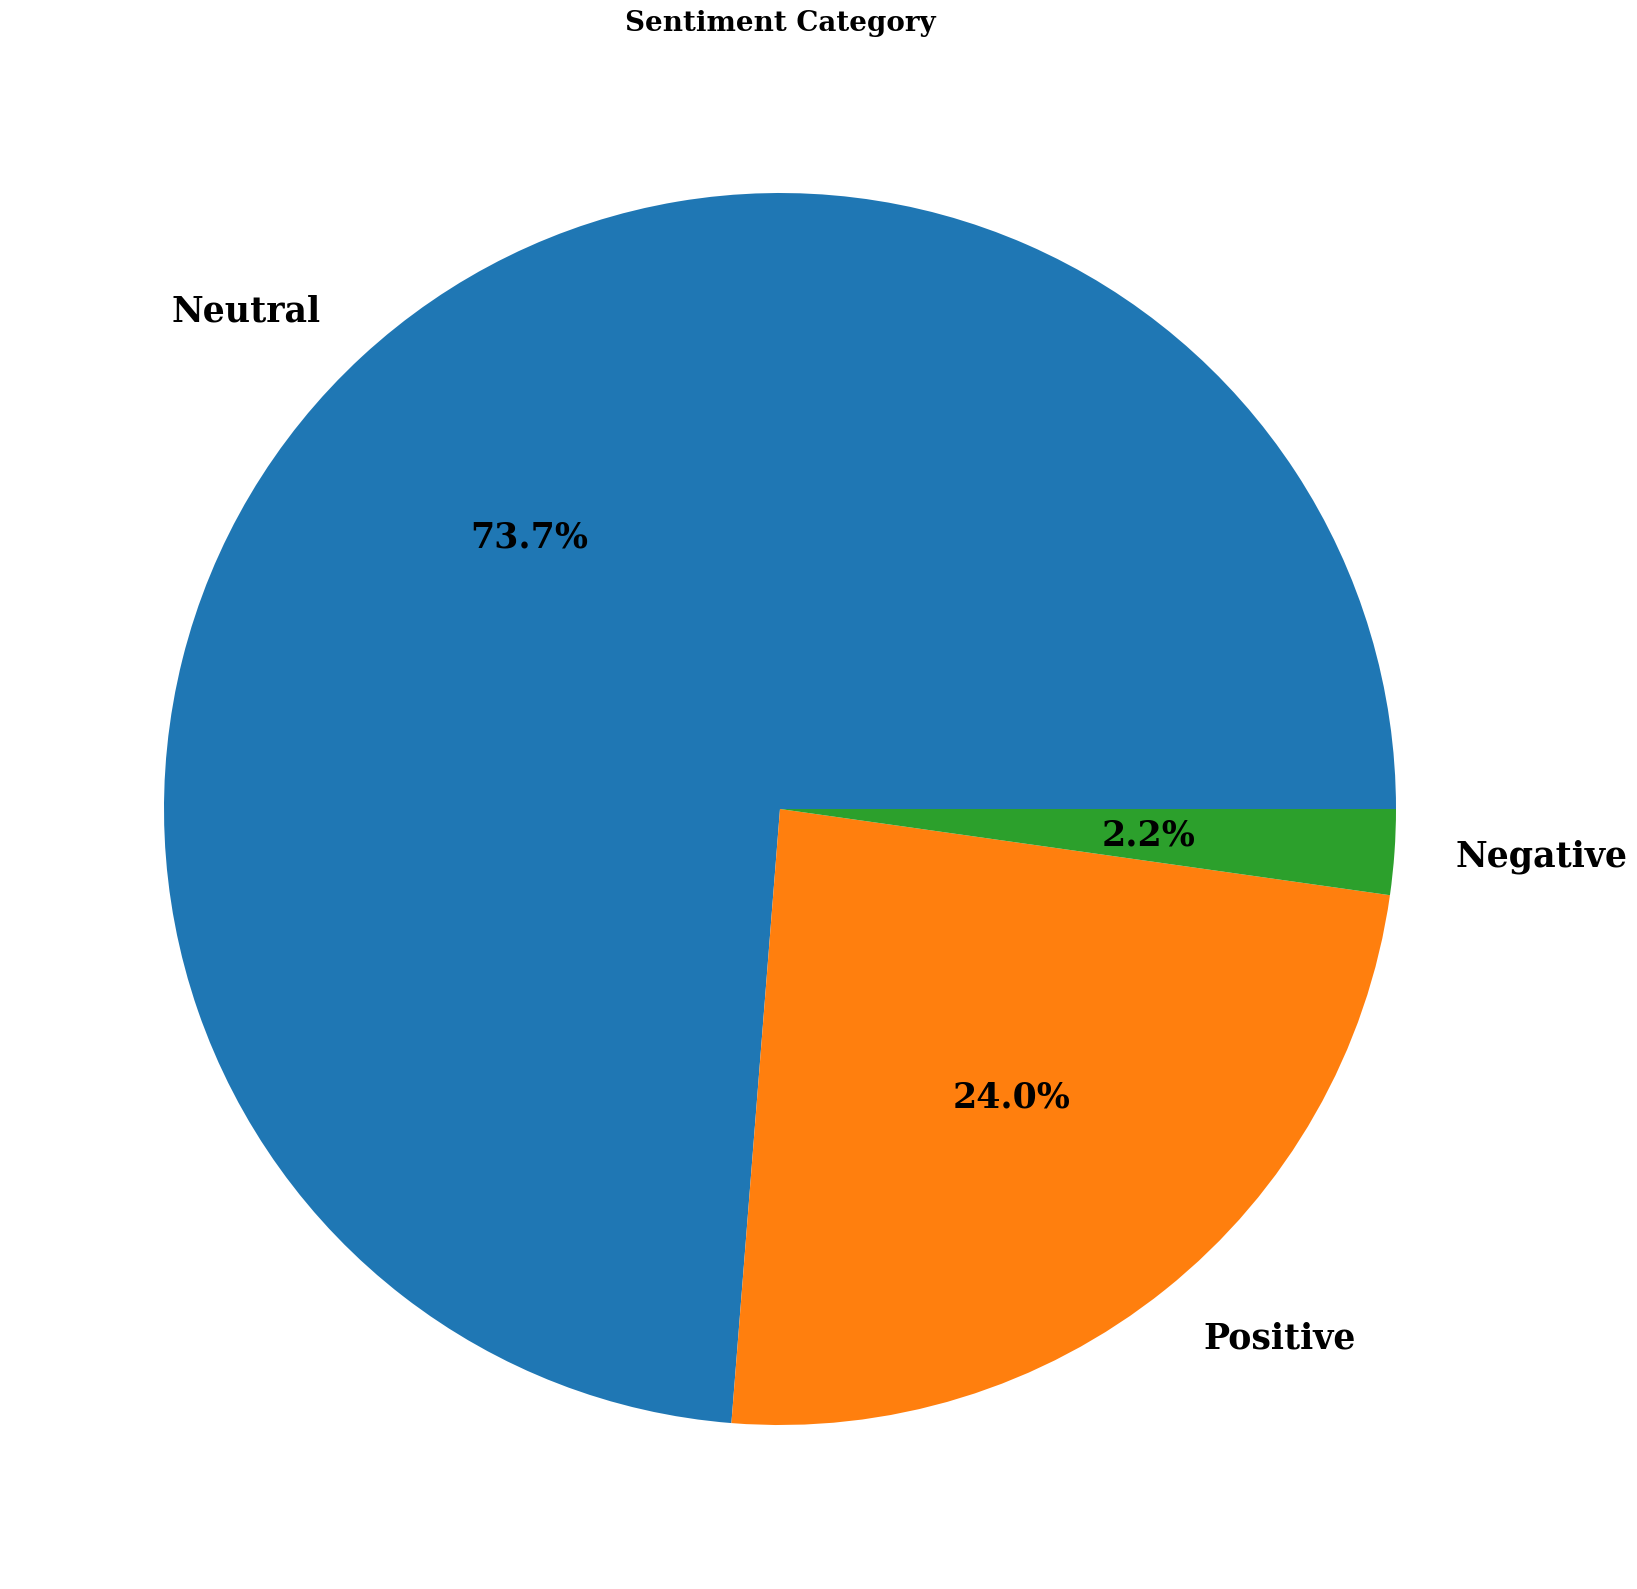

In [45]:
plt.figure(figsize=(30,20))
plt.pie(data['sentiment_category'].value_counts(), labels=data['sentiment_category'].value_counts().index,
        autopct='%1.1f%%', textprops={ 'fontsize': 25,'color': 'black', 'weight': 'bold','family': 'serif' })
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sentiment Category', size=20, **hfont)
plt.show()

In [46]:
def map_sentiment_to_numeric(sentiment_category):
  if sentiment_category == 'Positive':
    return 1
  elif sentiment_category == 'Negative':
    return -1
  else:
    return 0

In [47]:
data['sentiment_numeric'] = data['sentiment_category'].apply(map_sentiment_to_numeric)

In [48]:
# function to save the results of data that has been cleaned
data.to_excel('Wardah Company Data Analysis.xlsx')

In [49]:
data_new = data[['tweet_stemmed', 'sentiment_numeric']]
data_new

,tweet_stemmed,sentiment_numeric
0,bb micellar water wardah hasil terjang polusi,0
1,sumpah instaperfect salah series wardah merk s...,0
2,klaim beluum lumayan wardah,0
3,tolong salma pakai dress kayak wardah silet aw...,0
4,pandai mekap pakai wardah fd cushion besttt te...,0
...,...,...
174,kasih away cz daniel notice indonesia vlive m ...,1
175,lipstik habis dapat diskon bawa lipstik lama w...,0
176,suka watsons sale brand cuba contoh naruko war...,1
177,wardah beauty masuk watson benda first tengok ...,1


Visualization

In [50]:
from wordcloud import WordCloud

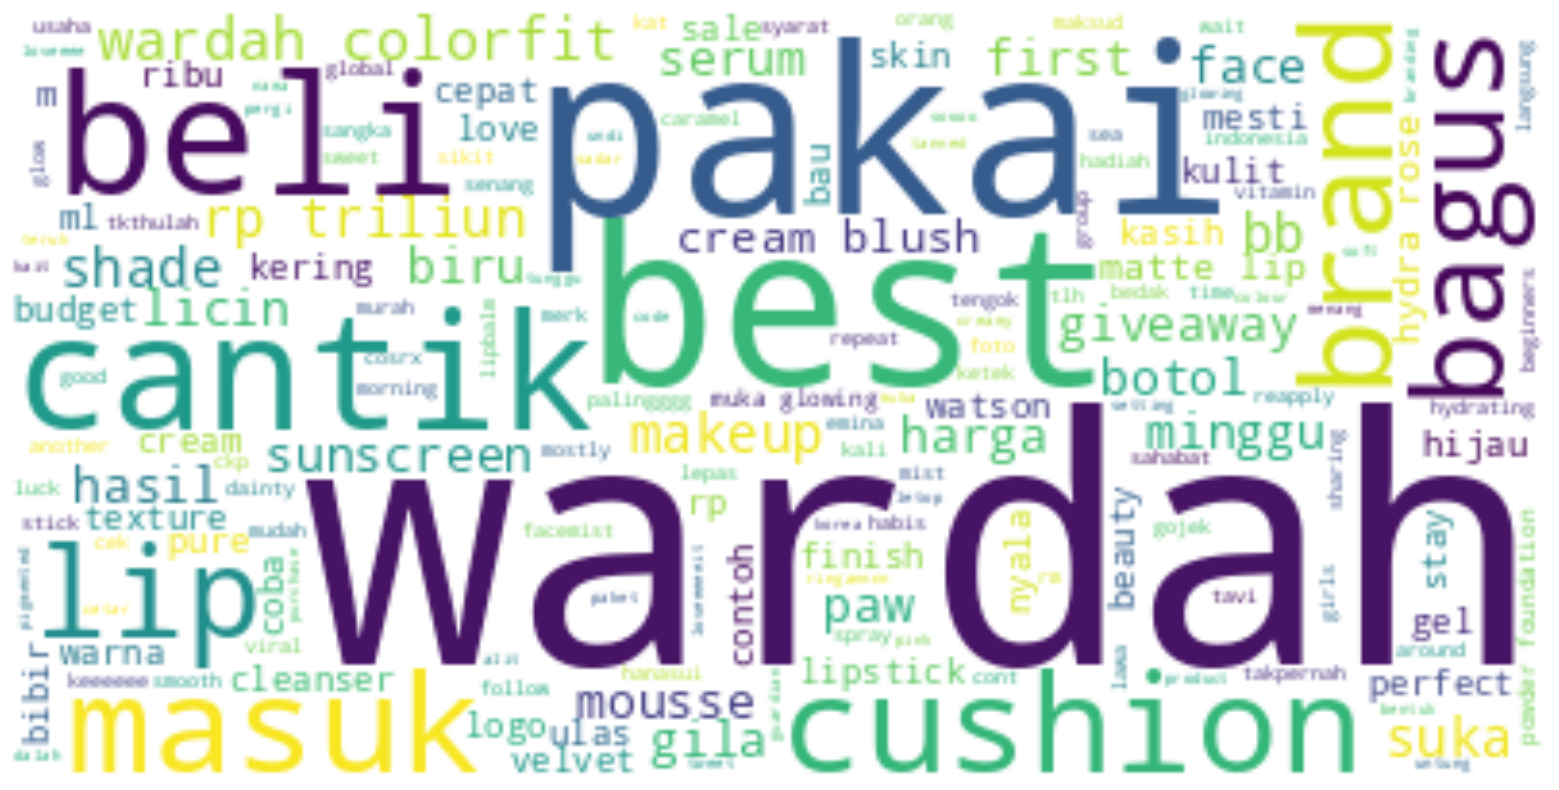

In [51]:
positive_text_data = ' '.join(data[data_new['sentiment_numeric'] == 1]['tweet_stemmed'])

if positive_text_data:
  wordcloud = WordCloud(background_color='white').generate(positive_text_data)

  fig, ax = plt.subplots(figsize=(30, 10))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis('off')
  plt.show()
else:
  print('No positive text data to generate a word cloud.')

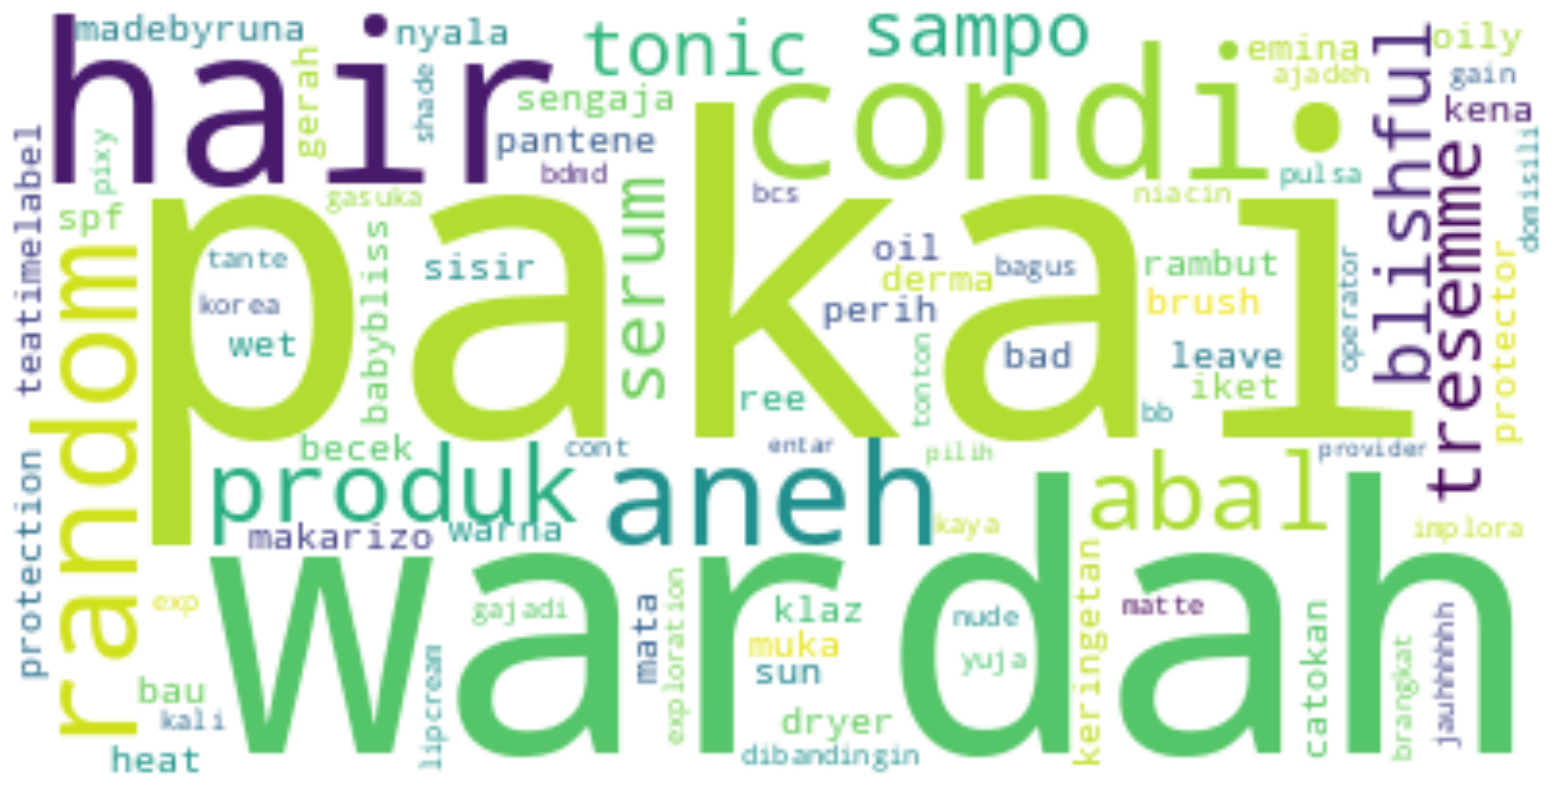

In [52]:
negative_text_data = ' '.join(data[data_new['sentiment_numeric'] == -1]['tweet_stemmed'])

if negative_text_data:
  wordcloud = WordCloud(background_color='white').generate(negative_text_data)

  fig, ax = plt.subplots(figsize=(30, 10))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis('off')
  plt.show()
else:
  print('No negative text data to generate a word cloud.')

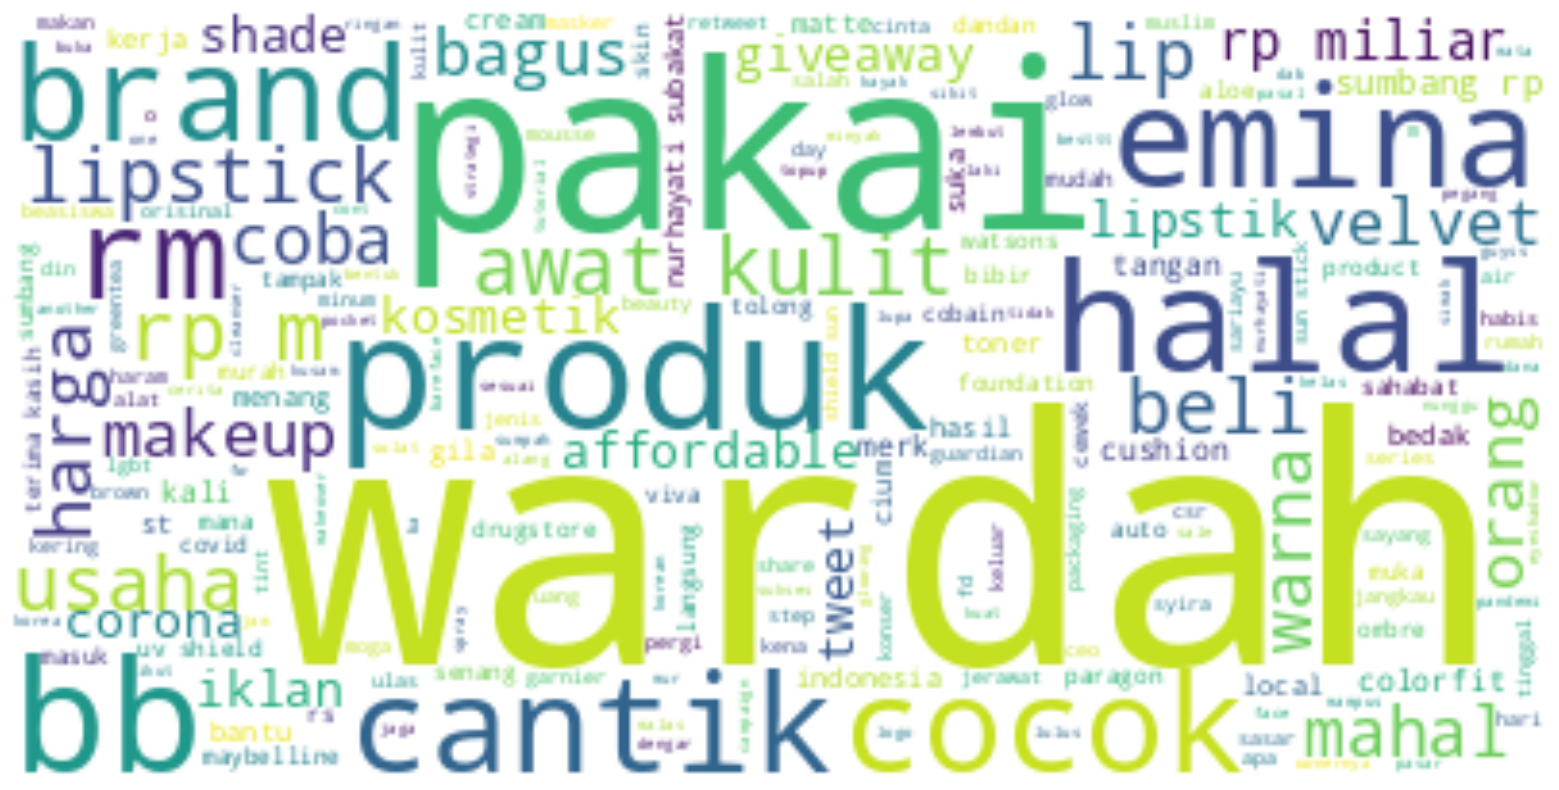

In [53]:
neutral_text_data = ' '.join(data[data_new['sentiment_numeric'] == 0]['tweet_stemmed'])

if neutral_text_data:
  wordcloud = WordCloud(background_color='white').generate(neutral_text_data)

  fig, ax = plt.subplots(figsize=(30, 10))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis('off')
  plt.show()
else:
  print('No neutral text data to generate a word cloud.')